In [2]:
# for basic operations
import numpy as np 
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

data = pd.read_csv('C:/Users/Kai/Desktop/Assignment3/data/breast-w_preproccess.csv')


(683, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
Clump_Thickness          683 non-null int64
Cell_Size_Uniformity     683 non-null int64
Cell_Shape_Uniformity    683 non-null int64
Marginal_Adhesion        683 non-null int64
Single_Epi_Cell_Size     683 non-null int64
Bare_Nuclei              683 non-null int64
Bland_Chromatin          683 non-null int64
Normal_Nucleoli          683 non-null int64
Mitoses                  683 non-null int64
Class                    683 non-null object
dtypes: int64(9), object(1)
memory usage: 53.4+ KB


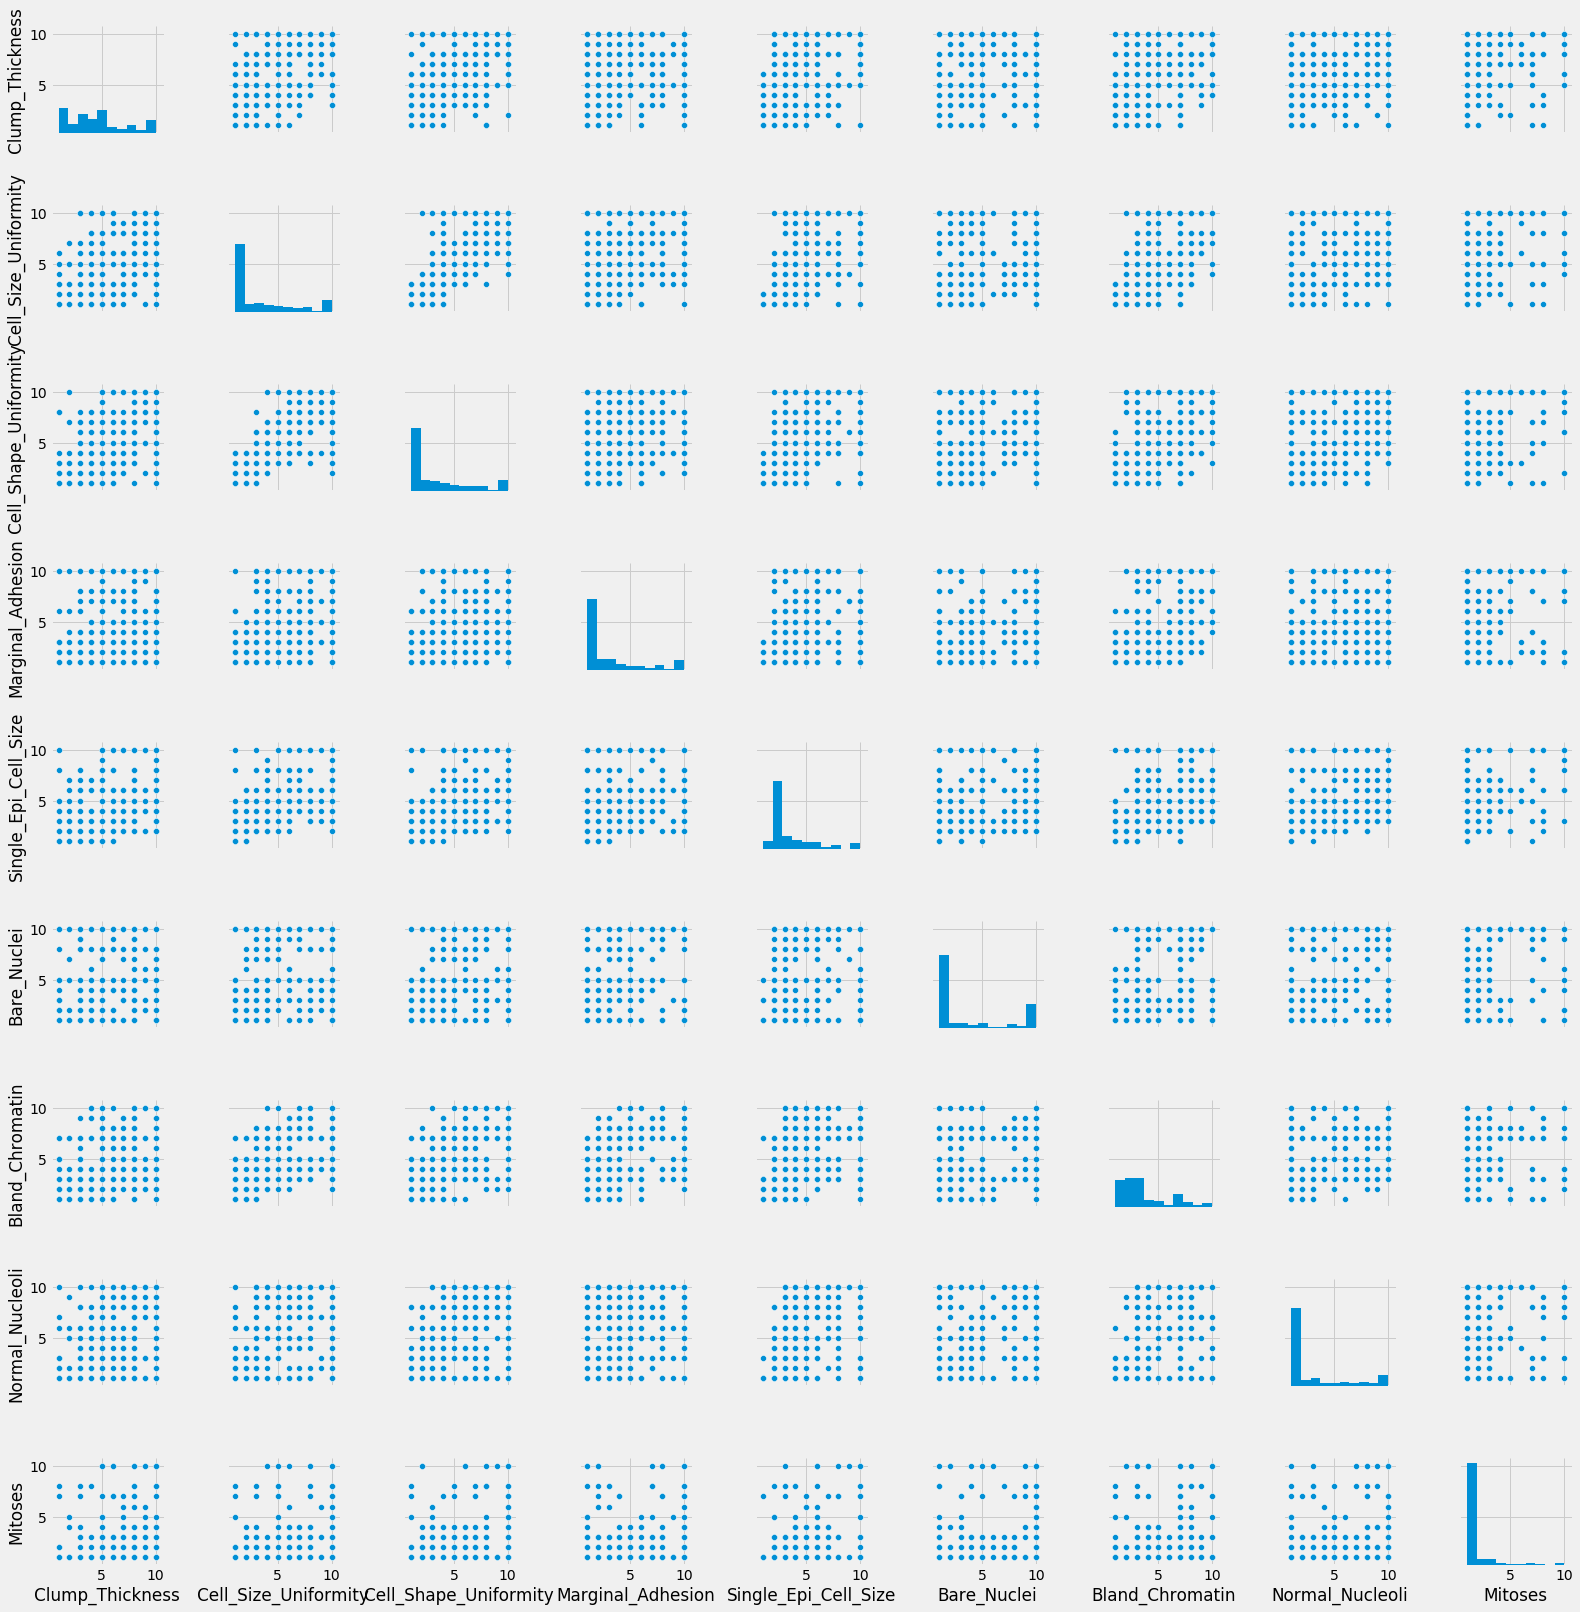

In [3]:
# for basic operations
import numpy as np 
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

data = pd.read_csv('C:/Users/Kai/Desktop/Assignment3/data/breast-w_preproccess.csv')

# printing the shape
print(data.shape)

# printing the head of the data
data.head()

# describing the data
data.describe()

# getting the info of the data
data.info()

# checking if the dataset contains any NULL Values
data.isnull().sum().sum()

sns.pairplot(data)


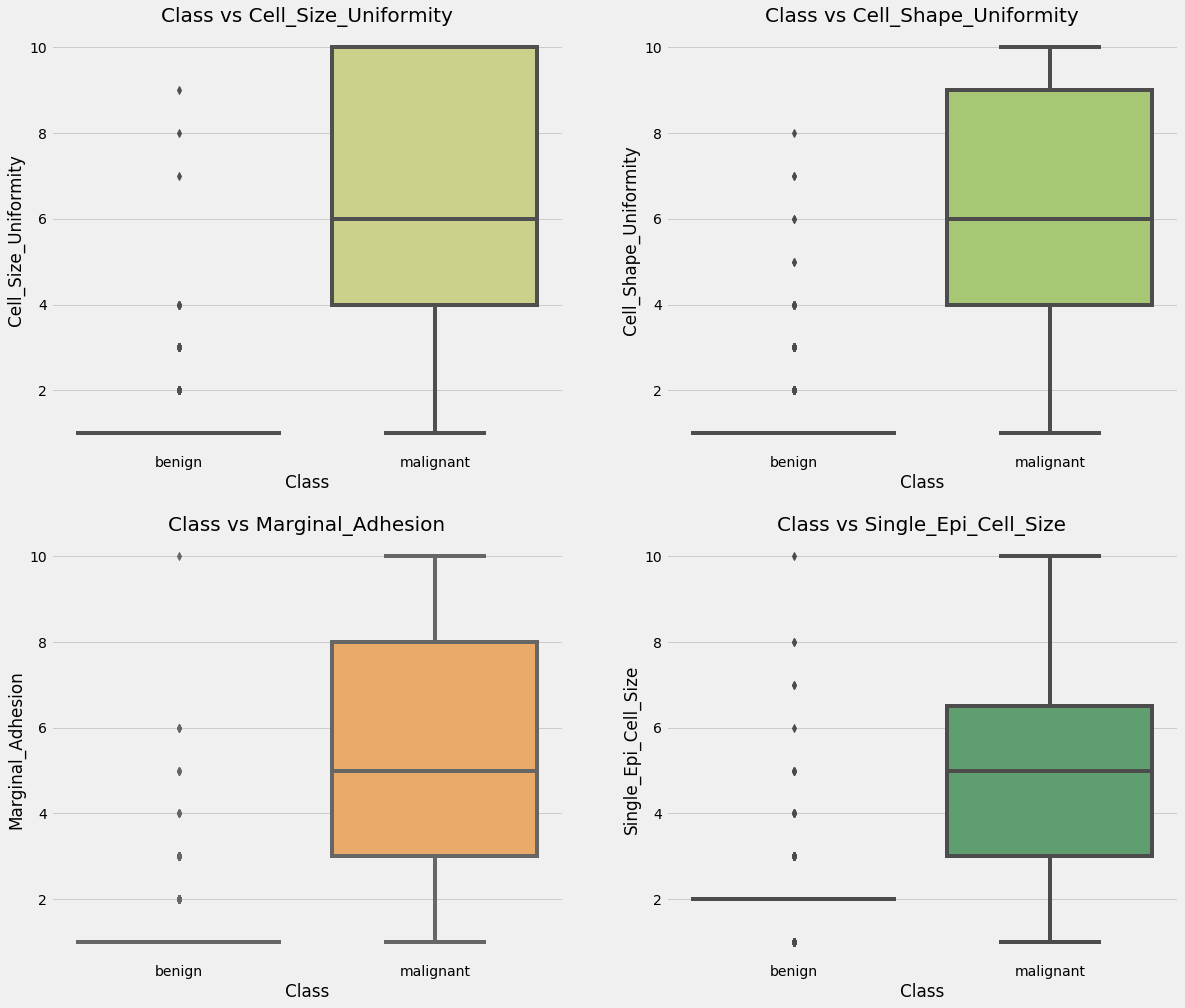

In [14]:
# boxen plots

plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(2, 2, 1)
sns.boxplot(x = data['Class'], y = data['Cell_Size_Uniformity'], data = data, palette = 'rainbow')
plt.title('Class vs Cell_Size_Uniformity', fontsize = 20)

plt.subplot(2, 2, 2)
sns.boxplot(x = 'Class', y = 'Cell_Shape_Uniformity', data = data, palette = 'summer')
plt.title('Class vs Cell_Shape_Uniformity', fontsize = 20)

plt.subplot(2, 2, 3)
sns.boxplot(x = 'Class', y = 'Marginal_Adhesion', data = data, palette = 'spring')
plt.title('Class vs Marginal_Adhesion', fontsize = 20)

plt.subplot(2, 2, 4)
sns.boxplot(x = 'Class', y = 'Single_Epi_Cell_Size', data = data, palette = 'deep')
plt.title('Class vs Single_Epi_Cell_Size', fontsize = 20)

plt.show()




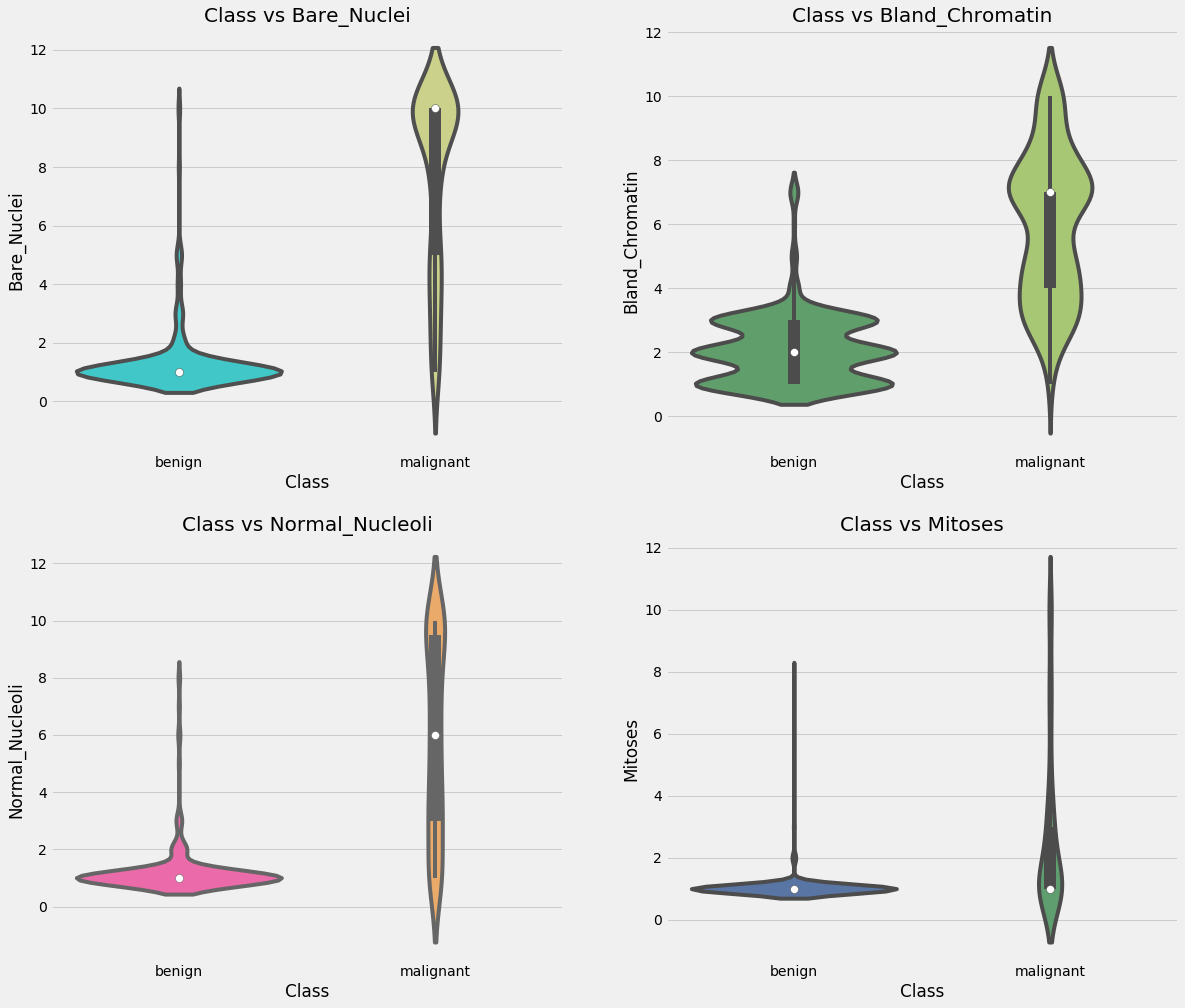

In [16]:
plt.rcParams['figure.figsize'] = (18, 16)


plt.subplot(2, 2, 1)
sns.violinplot(x = data['Class'], y = data['Bare_Nuclei'], data = data, palette = 'rainbow')
plt.title('Class vs Bare_Nuclei', fontsize = 20)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'Class', y = 'Bland_Chromatin', data = data, palette = 'summer')
plt.title('Class vs Bland_Chromatin', fontsize = 20)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'Class', y = 'Normal_Nucleoli', data = data, palette = 'spring')
plt.title('Class vs Normal_Nucleoli', fontsize = 20)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'Class', y = 'Mitoses', data = data, palette = 'deep')
plt.title('Class vs Mitoses', fontsize = 20)

plt.show()

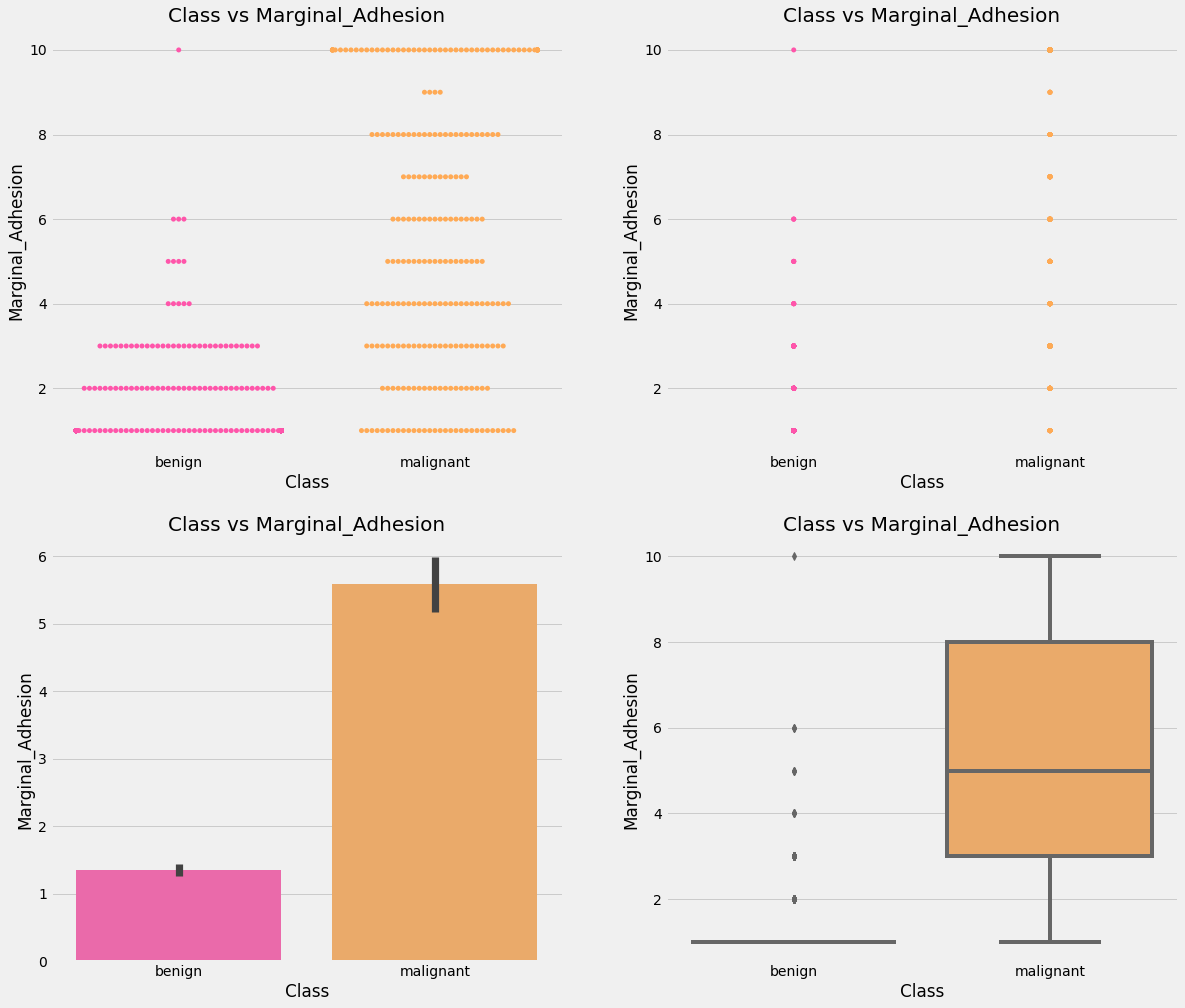

In [20]:
# boxen plots

plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(2, 2, 1)
sns.swarmplot(x = 'Class', y = 'Marginal_Adhesion', data = data, palette = 'spring')
plt.title('Class vs Marginal_Adhesion', fontsize = 20)

plt.subplot(2, 2, 2)
sns.stripplot(x = 'Class', y = 'Marginal_Adhesion', data = data, palette = 'spring')
plt.title('Class vs Marginal_Adhesion', fontsize = 20)

plt.subplot(2, 2, 3)
sns.barplot(x = 'Class', y = 'Marginal_Adhesion', data = data, palette = 'spring')
plt.title('Class vs Marginal_Adhesion', fontsize = 20)

plt.subplot(2, 2, 4)
sns.boxplot(x = 'Class', y = 'Marginal_Adhesion', data = data, palette = 'spring')
plt.title('Class vs Marginal_Adhesion', fontsize = 20)

plt.show()

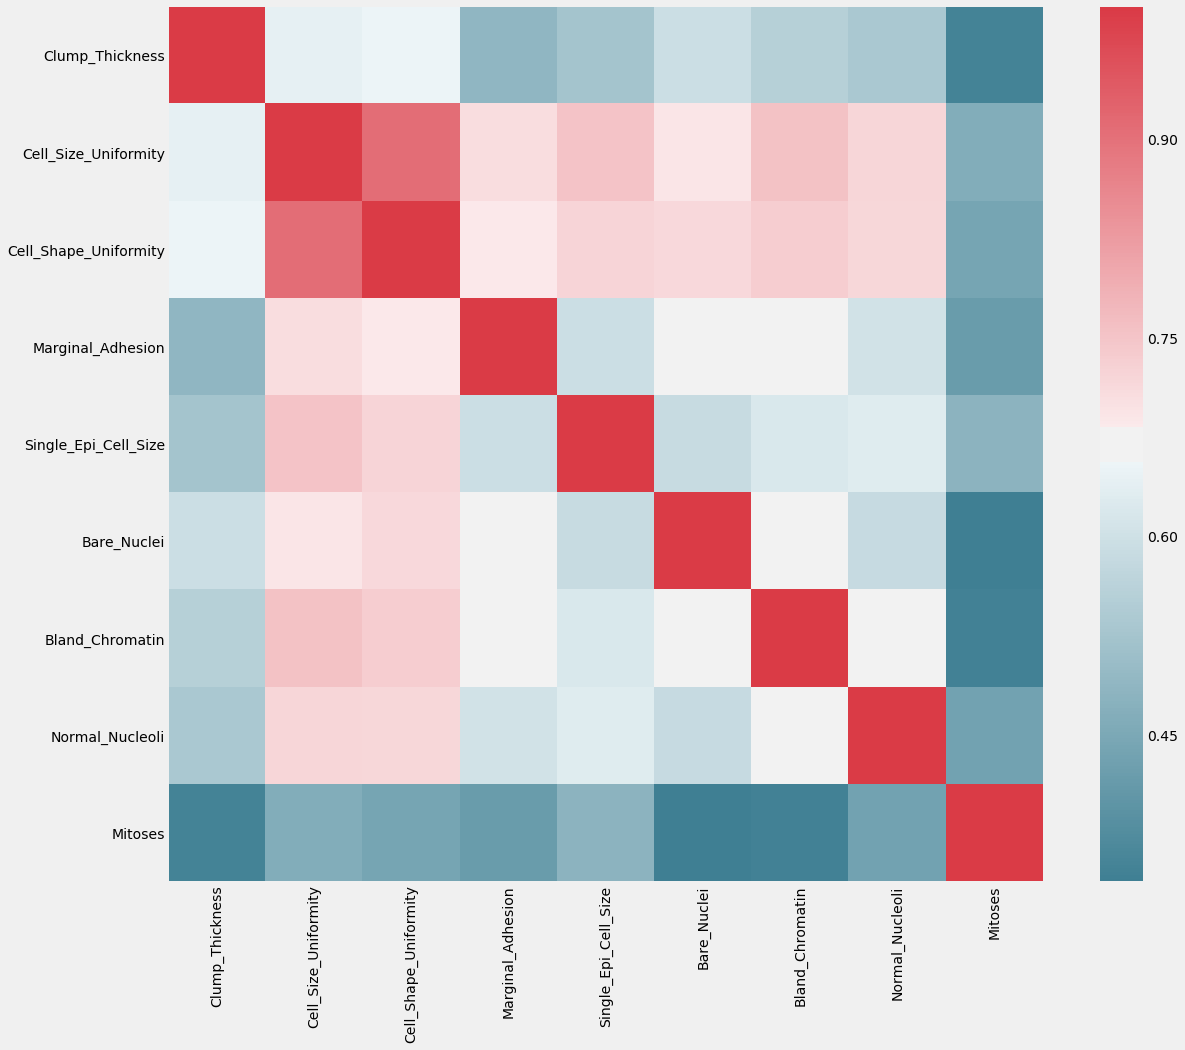

In [21]:
f, ax = plt.subplots(figsize=(18, 15))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [22]:
#  DATA PREPROCESSING

# label encoding of the dependent variable

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# performing label encoding
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

In [23]:
data['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [65]:
# splitting the dependent and independent variables from the dataset

x = data.iloc[:,0:9]
y = data.iloc[:,9]

print(x.shape)
print(y.shape)

(683, 9)
(683,)


In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 16)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(512, 9)
(512,)
(171, 9)
(171,)


In [71]:
# standard scaling 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Training accuracy : 1.0
Testing accuarcy : 0.935672514619883
             precision    recall  f1-score   support

          0       0.95      0.96      0.95       117
          1       0.91      0.89      0.90        54

avg / total       0.94      0.94      0.94       171



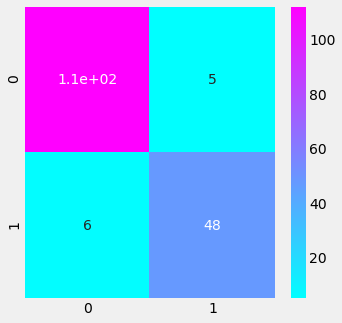

In [90]:
# LOGISTIC REGRESSION

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

# creating the model

model = DecisionTreeClassifier()

# feeding the training data into the model
model.fit(x_train, y_train)
y_prob = model.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  
# print(y_prob)
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'cool')

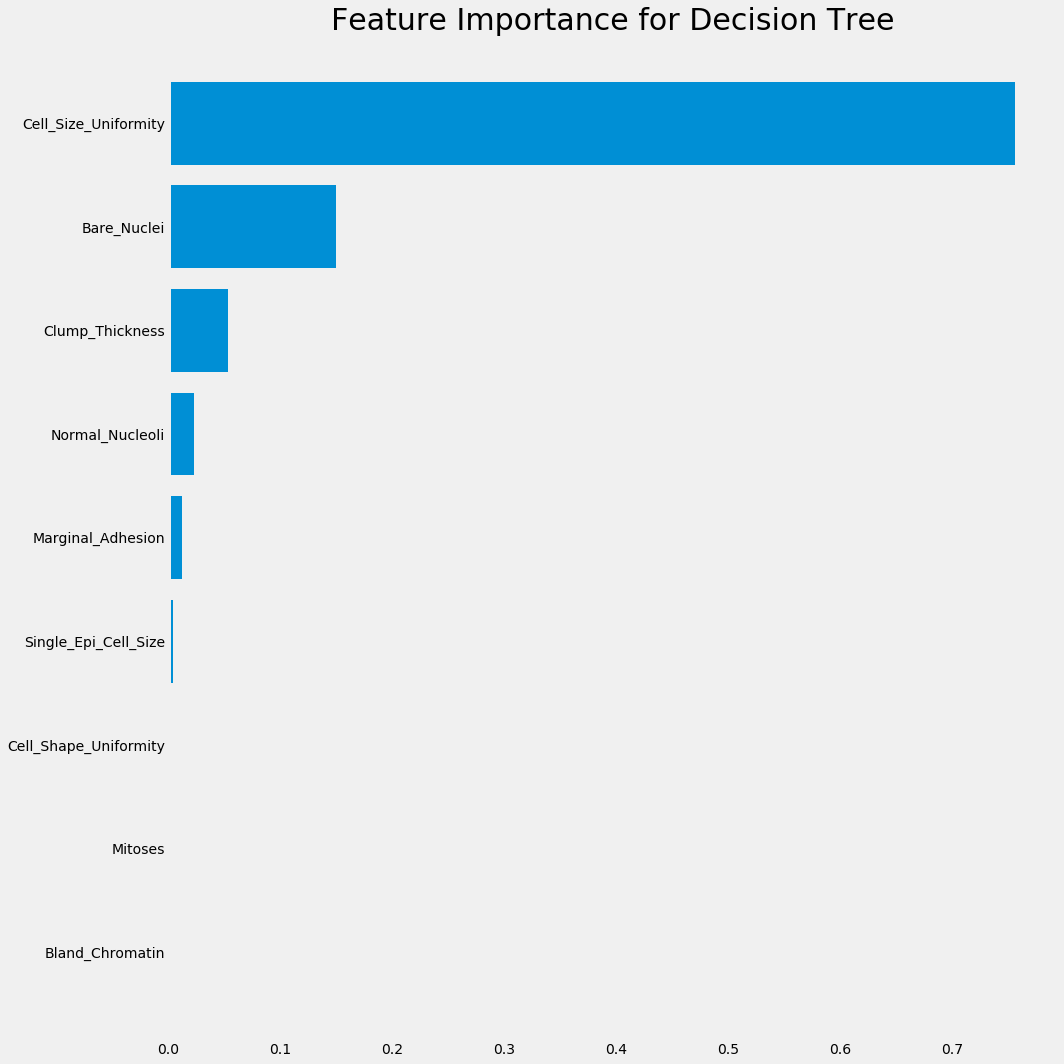

In [91]:
features = data.columns
importance = model.feature_importances_
indices = np.argsort(importance)

plt.rcParams['figure.figsize'] = (15, 15)
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), features[indices])
plt.title('Feature Importance for Decision Tree', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

auc_roc: 
0.9230769230769231
roc_auc: 
0.9230769230769231


Text(0.5,0,'False Positive Rate')

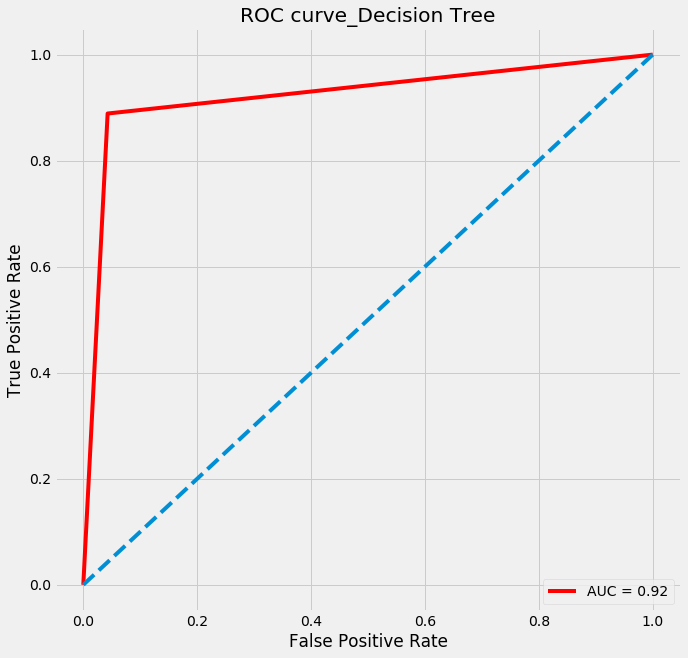

In [92]:
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print("auc_roc: ")
print(auc_roc)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc: ")
print(roc_auc)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ROC curve_Decision Tree')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Training accuracy : 0.982421875
Testing accuarcy : 0.9590643274853801
             precision    recall  f1-score   support

          0       0.98      0.96      0.97       117
          1       0.91      0.96      0.94        54

avg / total       0.96      0.96      0.96       171



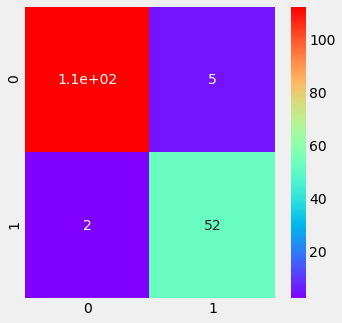

In [96]:
# Support Vector Machine

from sklearn.svm import SVC

# creating a model
model = SVC()

# feeding the training data into the model
model.fit(x_train, y_train)

# y_prob = model.predict_proba(x_test)[:,1] # This will give you positive class prediction probabilities  

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

auc_roc: 
0.9601139601139601
roc_auc: 
0.9230769230769231


Text(0.5,0,'False Positive Rate')

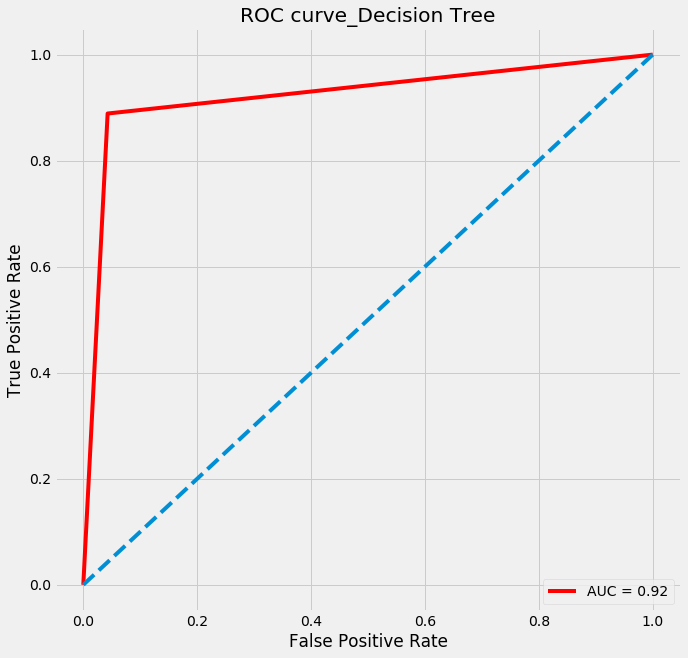

In [94]:
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print("auc_roc: ")
print(auc_roc)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc: ")
print(roc_auc)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ROC curve_Decision Tree')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')